In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as sk

In [2]:
data = pd.read_csv('train_temp3.csv')

In [3]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins_x,review_count,elite,average_stars,Rep,compliments,followers_count,tip_count,category,checkins_y,weekday_checkins,weekend_checkins
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,None,4.67,0.0,0.0,0.0,0.0,Food,119,80,39
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,"2015, 2017, 2016",3.41,53.0,69.0,234.0,1.0,Food,119,80,39
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,"2013, 2014",4.52,1.0,156.0,84.0,0.0,Food,119,80,39
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,None,3.98,1.0,8.0,92.0,0.0,Food,119,80,39
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,None,4.00,0.0,0.0,0.0,0.0,Food,119,80,39


In [5]:
business = pd.read_csv('businesses_proximity.csv')
business.head()

,business_id,state,latitude,longitude,lat_long,proximity,proximity_percent
0,FYWN1wneV18bWNgQjJ2GNg,AZ,33.330690,-111.978599,"[33.3306902, -111.9785992]",21976,42
1,He-G7vWjzVUysIKrfNbPUQ,PA,40.291685,-80.104900,"[40.2916853, -80.1048999]",4201,41
2,KQPW8lFf1y5BT2MxiSZ3QA,AZ,33.524903,-112.115310,"[33.5249025, -112.1153098]",25498,48
3,8DShNS-LuFqpEWIp0HxijA,AZ,33.383147,-111.964725,"[33.3831468, -111.96472539999999]",26003,49
4,PfOCPjBrlQAnz__NXj9h_w,OH,41.119535,-81.475690,"[41.1195346, -81.4756898]",1427,11


In [6]:
final = data.join(business.set_index('business_id'), on='business_id')
final.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins_x,review_count,elite,...,category,checkins_y,weekday_checkins,weekend_checkins,state,latitude,longitude,lat_long,proximity,proximity_percent
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,None,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,"2015, 2017, 2016",...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,"2013, 2014",...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,None,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,None,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92


In [7]:
final.to_csv('train_final.csv')

In [14]:
data = pd.read_csv('train_final.csv')

In [15]:
data.head()

,Unnamed: 0,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins_x,review_count,...,category,checkins_y,weekday_checkins,weekend_checkins,state,latitude,longitude,lat_long,proximity,proximity_percent
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
1,1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
2,2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
3,3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
4,4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92


In [16]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [17]:
data.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins_x,review_count,elite,...,category,checkins_y,weekday_checkins,weekend_checkins,state,latitude,longitude,lat_long,proximity,proximity_percent
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,None,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,"2015, 2017, 2016",...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,"2013, 2014",...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,None,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,None,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92


In [18]:
data[['elite']] = data[['elite']].astype(str)

In [19]:
for index, row in data.iterrows():
    if row['elite'] == 'None':
        data.set_value(index,'elite',0)
    else:
        data.set_value(index,'elite',row['elite'].count(',')+1)
        
data.head()

C:\Anaconda\envs\python2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Anaconda\envs\python2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins_x,review_count,elite,...,category,checkins_y,weekday_checkins,weekend_checkins,state,latitude,longitude,lat_long,proximity,proximity_percent
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,3,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,2,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,0,...,Food,119,80,39,QC,45.523333,-73.594859,"[45.5233326, -73.5948595]",7582,92


In [20]:
data.drop(['checkins_x','state','lat_long','state','latitude','longitude'], axis = 1, inplace = True)

In [21]:
data.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,review_count,elite,average_stars,Rep,compliments,followers_count,tip_count,category,checkins_y,weekday_checkins,weekend_checkins,proximity,proximity_percent
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,Food,119,80,39,7582,92
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,Food,119,80,39,7582,92
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,Food,119,80,39,7582,92
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,Food,119,80,39,7582,92
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,Food,119,80,39,7582,92


In [22]:
#data = pd.get_dummies(data)
data[['elite']] = data[['elite']].apply(pd.to_numeric)

In [23]:
data = data.rename(index=str, columns={"review_count": "user_review_count", "average_stars": "user_average_stars","checkins_y":"checkins"})

In [24]:
data.dtypes

review_id                 object
user_id                   object
business_id               object
review_rating              int64
city                      object
business_rating          float64
business_review_count      int64
user_review_count        float64
elite                      int64
user_average_stars       float64
Rep                      float64
compliments              float64
followers_count          float64
tip_count                float64
category                  object
checkins                   int64
weekday_checkins           int64
weekend_checkins           int64
proximity                  int64
proximity_percent          int64
dtype: object

In [ ]:
data.drop(['category'],inplace=True,axis=1)

In [ ]:
data.head()

In [4]:
data = pd.read_csv("DataSetRecommender.csv")
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data.head()

,review_id,user_id,business_id,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,119,80,39,7582,92
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,119,80,39,7582,92
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,119,80,39,7582,92
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,119,80,39,7582,92
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,119,80,39,7582,92


In [5]:
reviews = pd.read_csv('yelp_review.csv')
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [25]:
#reviews.drop(['user_id','business_id','stars','date','useful','funny','cool'],axis=1,inplace=True)
reviews.head()

,review_id,text
0,vkVSCC7xljjrAI4UGfnKEQ,Super simple place but amazing nonetheless. It...
1,n6QzIUObkYshz4dz2QRJTw,Small unassuming place that changes their menu...
2,MV3CcKScW05u5LVfF6ok0g,Lester's is located in a beautiful neighborhoo...
3,IXvOzsEMYtiJI0CARmj77Q,Love coming here. Yes the place always needs t...
4,L_9BTb55X0GDtThi6GlZ6w,Had their chocolate almond croissant and it wa...


In [27]:
combined = data.join(reviews.set_index('review_id'), on='review_id')

In [28]:
combined.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,user_review_count,elite,user_average_stars,...,compliments,followers_count,tip_count,category,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent,text
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,6.0,0,4.67,...,0.0,0.0,0.0,Food,119,80,39,7582,92,Super simple place but amazing nonetheless. It...
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,177.0,3,3.41,...,69.0,234.0,1.0,Food,119,80,39,7582,92,*The shop was featured on Mind of a Chef with ...
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,79.0,2,4.52,...,156.0,84.0,0.0,Food,119,80,39,7582,92,"As its name suggests, Wilensky's is a lunch co..."
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,40.0,0,3.98,...,8.0,92.0,0.0,Food,119,80,39,7582,92,"Stopped by for the Wilensky's Special, loved i..."
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,3.0,0,4.00,...,0.0,0.0,0.0,Food,119,80,39,7582,92,"I have to admit, I am a fan. Just entering the..."


In [48]:
Food_Only = combined.query('category == "Food" or category == "Restaurants"')
Food_Only.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,user_review_count,elite,user_average_stars,...,compliments,followers_count,tip_count,category,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent,text
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,6.0,0,4.67,...,0.0,0.0,0.0,Food,119,80,39,7582,92,Super simple place but amazing nonetheless. It...
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,177.0,3,3.41,...,69.0,234.0,1.0,Food,119,80,39,7582,92,*The shop was featured on Mind of a Chef with ...
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,79.0,2,4.52,...,156.0,84.0,0.0,Food,119,80,39,7582,92,"As its name suggests, Wilensky's is a lunch co..."
3,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,40.0,0,3.98,...,8.0,92.0,0.0,Food,119,80,39,7582,92,"Stopped by for the Wilensky's Special, loved i..."
4,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,3.0,0,4.00,...,0.0,0.0,0.0,Food,119,80,39,7582,92,"I have to admit, I am a fan. Just entering the..."


In [49]:
Elite_Only = Food_Only.query('elite > 0')
Elite_Only.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,user_review_count,elite,user_average_stars,...,compliments,followers_count,tip_count,category,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent,text
1,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,177.0,3,3.41,...,69.0,234.0,1.0,Food,119,80,39,7582,92,*The shop was featured on Mind of a Chef with ...
2,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,79.0,2,4.52,...,156.0,84.0,0.0,Food,119,80,39,7582,92,"As its name suggests, Wilensky's is a lunch co..."
8,3X78HuYLgt5DcDQpb7d7XA,NGLufCod1pP760aBucp3tw,AEx2SYEUJmTxVVB18LlCwA,3,Montréal,4.0,84,83.0,2,4.16,...,26.0,227.0,2.0,Food,119,80,39,7582,92,After hearing so many things about this famed ...
11,LGL-79vgEga5b3fxMcoSEg,06hNNsVZO78El38qNJaETA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,59.0,3,4.67,...,58.0,145.0,11.0,Food,119,80,39,7582,92,As you enter Wilensky's you're transported to ...
13,Ola3SJEW7UuRIkiFID8xfA,nLvssaSephFYKHVjMd0XFg,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,285.0,5,4.35,...,46.0,85.0,0.0,Food,119,80,39,7582,92,Get the special with swiss along with a chocol...


In [50]:
Toronto = Elite_Only.query('city == "Toronto"')
Toronto.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,user_review_count,elite,user_average_stars,...,compliments,followers_count,tip_count,category,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent,text
700,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,Toronto,4.0,111,359.0,6,3.62,...,36.0,55.0,1.0,Restaurants,135,69,66,22347,73,Who would have guess that you would be able to...
702,JTXSJISM3rPmKTgPxrEbrQ,VHc1yqBhsE-l3JQFXuWydQ,9_CGhHMz8698M9-PkVf0CQ,4,Toronto,4.0,111,280.0,5,3.73,...,64.0,106.0,0.0,Restaurants,135,69,66,22347,73,Great little family run gem on a surprising cu...
706,G5_qRZ5NC1SKIjyV9KR9KQ,ROVBfaB3xl_4rJBvaAuQLw,9_CGhHMz8698M9-PkVf0CQ,4,Toronto,4.0,111,48.0,1,3.98,...,17.0,58.0,5.0,Restaurants,135,69,66,22347,73,Little Coxwell is one of the best - if not the...
707,uFDT8hH8-6hmWi_xnOxDDg,D8KDGxSPMoOYU50BSEuJeQ,9_CGhHMz8698M9-PkVf0CQ,4,Toronto,4.0,111,186.0,9,4.16,...,816.0,191.0,0.0,Restaurants,135,69,66,22347,73,God I love this place.\n\nCozy and home cooked...
708,UBQQOomUQzn3NahfYS3epw,20CagUV7kGKjHpYzlIV_GA,9_CGhHMz8698M9-PkVf0CQ,4,Toronto,4.0,111,110.0,2,4.08,...,132.0,305.0,0.0,Restaurants,135,69,66,22347,73,"During summer, this is my go-to pho place beca..."


In [51]:
len(Toronto)

114464

In [52]:
Vegas = Elite_Only.query('city == "Las Vegas"')
Vegas.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,user_review_count,elite,user_average_stars,...,compliments,followers_count,tip_count,category,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent,text
18277,QgSf2JvYz-M4PU2yuJjxNQ,nOTl4aPC4tKHK35T3bNauQ,9Jc3W0aR9Xf2gcHI0rEXsw,1,Las Vegas,3.0,57,148.0,3,3.21,...,23.0,50.0,0.0,Restaurants,127,78,49,31680,95,"After being scared away from Rock & Rita's, we..."
18280,s8j02t2pcqtGzZTwRwYsHA,gU_sKjppz47562zsiccDLw,9Jc3W0aR9Xf2gcHI0rEXsw,5,Las Vegas,3.0,57,320.0,4,4.10,...,768.0,841.0,0.0,Restaurants,127,78,49,31680,95,The Garden Grill is located inside the Circus ...
18292,V2m_KNRyfpRjvf_pho865w,TBEiWGQoVXCq5sYuOzeBkw,9Jc3W0aR9Xf2gcHI0rEXsw,3,Las Vegas,3.0,57,351.0,3,3.24,...,532.0,845.0,165.0,Restaurants,127,78,49,31680,95,"Eeehhhh, this restaurant isn't all that great...."
18296,p4zYNVVX7Y0aCYfWv606Pg,o0_SrfBy_H5UY98auVa3EQ,9Jc3W0aR9Xf2gcHI0rEXsw,3,Las Vegas,3.0,57,267.0,5,3.32,...,276.0,168.0,0.0,Restaurants,127,78,49,31680,95,Recipe for the Rose Garden Hard Float:\n\nroot...
18300,i4SIw-shVZW2oxUuNhmoKQ,I9e80hahLUuqyvM0ft3EdA,9Jc3W0aR9Xf2gcHI0rEXsw,2,Las Vegas,3.0,57,114.0,1,3.84,...,19.0,44.0,0.0,Restaurants,127,78,49,31680,95,"Our service here was so slow, we thought we'd ..."


In [53]:
len(Vegas)

218183

In [54]:
Phx = Elite_Only.query('city == "Phoenix"')
Phx.head()

,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,user_review_count,elite,user_average_stars,...,compliments,followers_count,tip_count,category,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent,text
13806,ISVH_Z8ulZrphe21v8O2Ww,yis0tDX83YnFLzUbKZ_KFg,JlNeaOymdVbE6_bubqjohg,5,Phoenix,3.5,103,288.0,7,4.24,...,90.0,151.0,285.0,Restaurants,234,122,112,19508,37,This place is my guilty pleasure! #5 combo wit...
13813,Fgmv5igN3Y3pwHCyT39Szg,IvX50u_2WYXh_G1xKUa2Pg,JlNeaOymdVbE6_bubqjohg,3,Phoenix,3.5,103,169.0,4,3.49,...,139.0,364.0,6.0,Restaurants,234,122,112,19508,37,Papa Chevo's is definitely the place to go for...
13823,oNdYTZopFTqSJuvVkU7hfQ,daOtt6yZinis4_KTC30e_A,JlNeaOymdVbE6_bubqjohg,2,Phoenix,3.5,103,86.0,3,3.67,...,76.0,115.0,1.0,Restaurants,234,122,112,19508,37,"Well, came back to give this place a chance si..."
13831,4i8vNNCeEF6ZfwVsTEp_ug,lU_aNRWw8edBmIi5_NARmg,JlNeaOymdVbE6_bubqjohg,3,Phoenix,3.5,103,328.0,6,3.75,...,407.0,351.0,18.0,Restaurants,234,122,112,19508,37,"Sort of middle-of-the-road taqueria food, but ..."
13835,hvkZKz9ze_CF6sCFGeeJwA,vRJUVOSOOY4VeQkfiV6nIw,JlNeaOymdVbE6_bubqjohg,4,Phoenix,3.5,103,70.0,1,3.54,...,6.0,55.0,11.0,Restaurants,234,122,112,19508,37,I got the nachos with carne asada and they wer...


In [55]:
len(Phx)

66101

In [57]:
Toronto.to_csv("Toronto.csv")
Vegas.to_csv("Vegas.csv")
Phx.to_csv("Phx.csv")

In [60]:
t = Toronto.groupby("user_id",as_index=False)
Toronto_Training = []
Toronto_Test = []
for key in t.groups.keys():
    group = t.get_group(key)
    train, test = sk.train_test_split(group,train_size = .8, random_state = 12,shuffle = True)
    Toronto_Training.append(train)
    Toronto_Test.append(test)

C:\Anaconda\envs\python2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [63]:
training_toronto = pd.concat(Toronto_Training)
testing_toronto = pd.concat(Toronto_Test)

In [67]:
training_toronto.to_csv("training_toronto.csv")
testing_toronto.to_csv("testing_toronto.csv")

In [69]:
v = Vegas.groupby("user_id",as_index=False)
Vegas_Training = []
Vegas_Test = []
for key in v.groups.keys():
    group = v.get_group(key)
    train, test = sk.train_test_split(group,train_size = .8, random_state = 12,shuffle = True)
    Vegas_Training.append(train)
    Vegas_Test.append(test)

In [71]:
training_vegas = pd.concat(Vegas_Training)
testing_vegas = pd.concat(Vegas_Test)

In [72]:
training_vegas.to_csv("training_vegas.csv")
testing_vegas.to_csv("testing_vegas.csv")

In [73]:
p = Phx.groupby("user_id",as_index=False)
Phx_Training = []
Phx_Test = []
for key in p.groups.keys():
    group = p.get_group(key)
    train, test = sk.train_test_split(group,train_size = .8, random_state = 12,shuffle = True)
    Phx_Training.append(train)
    Phx_Test.append(test)

In [74]:
training_phx = pd.concat(Phx_Training)
testing_phx = pd.concat(Phx_Test)

In [75]:
training_phx.to_csv("training_phx.csv")
testing_phx.to_csv("testing_phx.csv")

In [15]:
data.to_csv("DataSetRecommender.csv")

In [41]:
data.describe()

,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent
count,5.098121e+06,5.098121e+06,5.098121e+06,5.098115e+06,5.098121e+06,5.098115e+06,5.098115e+06,5.098115e+06,5.098115e+06,5.098115e+06,5.098121e+06,5.098121e+06,5.098121e+06,5.098121e+06,5.098121e+06
mean,3.725434e+00,3.728406e+00,3.609815e+02,1.239871e+02,9.290138e-01,3.736253e+00,6.881387e+02,1.981573e+02,1.266561e+02,1.347605e+01,1.499917e+03,8.798000e+02,6.201172e+02,2.031270e+04,6.547878e+01
std,1.424168e+00,7.202649e-01,7.447807e+02,3.442768e+02,2.011176e+00,7.715341e-01,6.634531e+03,1.582413e+03,4.227205e+02,6.778467e+01,5.424823e+03,3.549622e+03,1.974268e+03,9.806668e+03,2.528146e+01
min,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.500000e+00,3.700000e+01,7.000000e+00,0.000000e+00,3.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.400000e+01,3.300000e+01,1.800000e+01,9.749000e+03,4.700000e+01
50%,4.000000e+00,4.000000e+00,1.150000e+02,2.500000e+01,0.000000e+00,3.800000e+00,5.000000e+00,2.000000e+00,1.600000e+01,0.000000e+00,2.650000e+02,1.590000e+02,1.010000e+02,2.271400e+04,7.100000e+01
75%,5.000000e+00,4.000000e+00,3.360000e+02,1.000000e+02,0.000000e+00,4.190000e+00,4.400000e+01,1.700000e+01,9.400000e+01,3.000000e+00,1.063000e+03,6.240000e+02,4.300000e+02,2.924400e+04,9.100000e+01
max,5.000000e+00,5.000000e+00,7.361000e+03,1.195400e+04,1.300000e+01,5.000000e+00,6.598870e+05,2.764190e+05,1.524900e+04,1.905000e+03,1.319580e+05,9.183000e+04,4.012800e+04,3.185000e+04,1.000000e+02


In [42]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=24)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

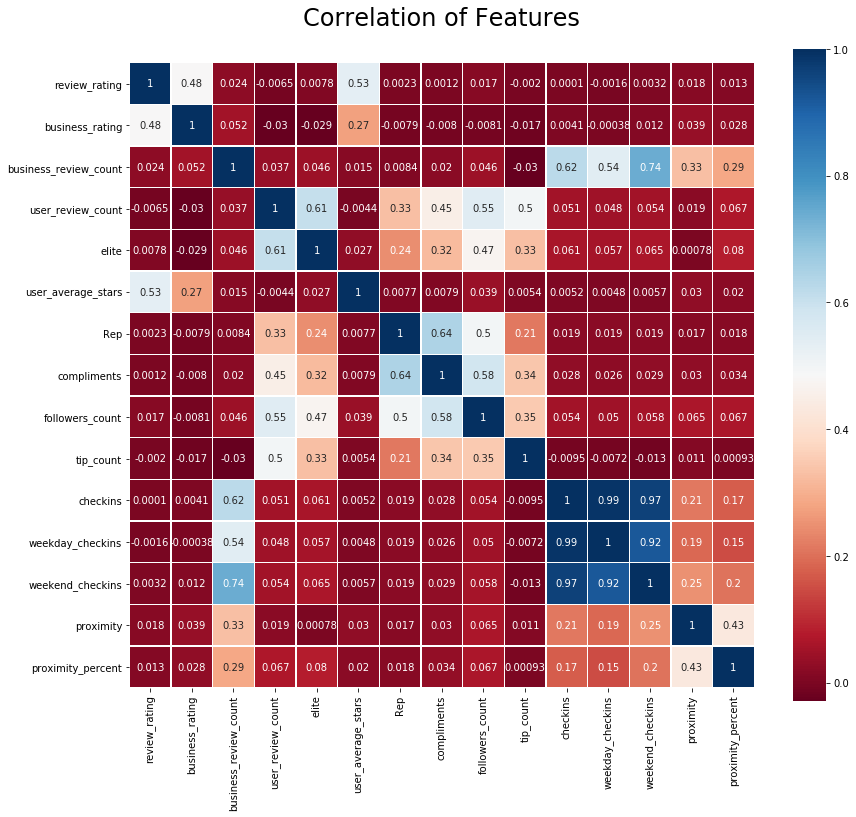

In [43]:
plt.show()

In [2]:
data = pd.read_csv('NumericData.csv')
data.drop(['Unnamed: 0'],axis = 1, inplace=True)
data.head()

,Unnamed: 0,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent
0,0,5,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,119,80,39,7582,92
1,1,5,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,119,80,39,7582,92
2,2,5,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,119,80,39,7582,92
3,3,5,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,119,80,39,7582,92
4,4,4,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,119,80,39,7582,92


In [3]:
data.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [4]:
y = data['review_rating']

C:\Anaconda\envs\python2\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


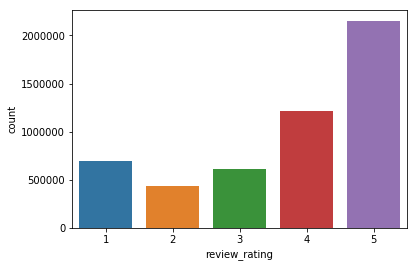

In [11]:
ax = sns.countplot(y,label="Count")       
plt.show()
#r1, r15, r2, r25, r3, r35, r4 = y.value_counts()
#print('Number of Benign: ',B)
#print('Number of Malignant : ',M)

In [2]:
data = pd.read_csv('AUC_data.csv')
data.drop(['Unnamed: 0'],axis=1,inplace = True)

X = data.drop(['review_rating'],axis =1)
y = data['review_rating']
data.head()

,review_rating,business_rating,business_review_count,user_review_count,elite,user_average_stars,Rep,compliments,followers_count,tip_count,checkins,weekday_checkins,weekend_checkins,proximity,proximity_percent
0,0,4.0,84,6.0,0,4.67,0.0,0.0,0.0,0.0,119,80,39,7582,92
1,0,4.0,84,177.0,3,3.41,53.0,69.0,234.0,1.0,119,80,39,7582,92
2,0,4.0,84,79.0,2,4.52,1.0,156.0,84.0,0.0,119,80,39,7582,92
3,0,4.0,84,40.0,0,3.98,1.0,8.0,92.0,0.0,119,80,39,7582,92
4,0,4.0,84,3.0,0,4.00,0.0,0.0,0.0,0.0,119,80,39,7582,92


In [6]:
x = pd.melt(data.iloc[:,0:8], id_vars = "review_rating", var_name = 'features')
x.head()

,review_rating,features,value
0,0,business_rating,4.0
1,0,business_rating,4.0
2,0,business_rating,4.0
3,0,business_rating,4.0
4,0,business_rating,4.0


In [7]:
sns.violinplot(x="features", y="value", hue="review_rating", data=x,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Anaconda\envs\python2\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Anaconda\envs\python2\lib\site-packages\seaborn\categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
C:\Anaconda\envs\python2\lib\site-packages\seaborn\categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

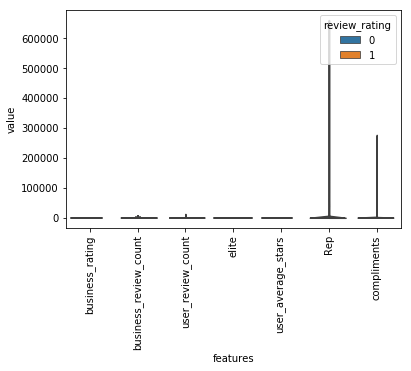

In [8]:
plt.show()

In [11]:
len(x)
x = x[:100000]
len(x)

100000

In [ ]:
sns.swarmplot(x="features", y="value", hue="review_rating", data=x)
plt.xticks(rotation=90)

In [ ]:
plt.show()